<a href="https://colab.research.google.com/github/gaws15/AINotebooksVault/blob/main/00_paper_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-image read and filterings

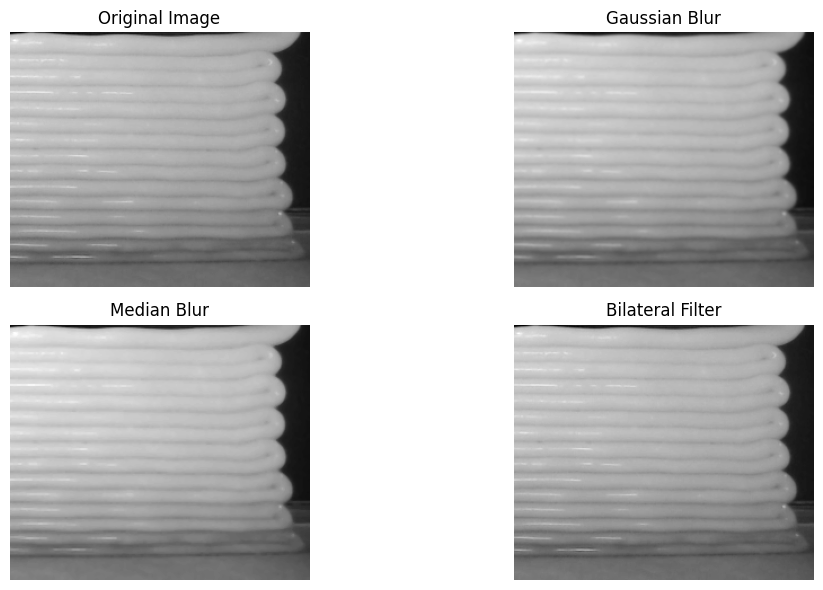

In [170]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Read the image
img = cv2.imread('/content/imgXX.jpg', 0)  # 0 for grayscale
# Get the dimensions of the image
height, width = img.shape[:2]

# Calculate the new dimensions (half size)
new_height = height // 2
new_width = width // 2

# Resize the image
img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)

kernel_size=(3, 3)
  # Apply Gaussian Blur
gaussian_blur = cv2.GaussianBlur(img, kernel_size, 0)

    # Apply Median Blur
median_blur = cv2.medianBlur(img, kernel_size[0])  # Kernel size is a single value for medianBlur

    # Apply Bilateral Filter
bilateral_blur = cv2.bilateralFilter(img, 9, 75, 75)
normalize = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(median_blur, cmap='gray')
plt.title('Median Blur')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(normalize, cmap='gray')
plt.title('Bilateral Filter')
plt.axis('off')

plt.tight_layout()
plt.show()



2-Adaptive thresholding parts

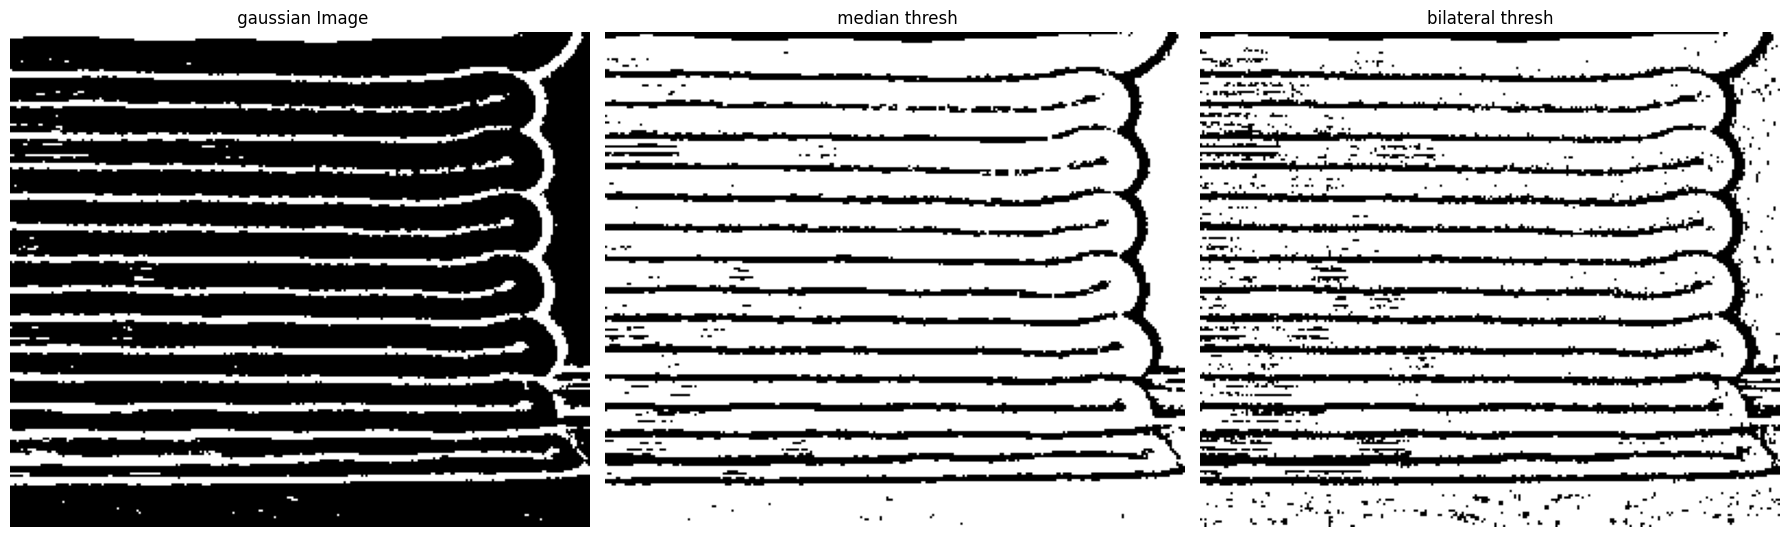

In [171]:

# Apply adaptive thresholding on the blurred image
thresh1 = cv2.adaptiveThreshold(gaussian_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
thresh2 = cv2.adaptiveThreshold(median_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
thresh3 = cv2.adaptiveThreshold(normalize, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
thresh4=thresh1*thresh2

# Display setup
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.imshow(thresh1, cmap='gray')
ax1.set_title(' gaussian Image')
ax1.axis('off')

ax2.imshow(thresh2, cmap='gray')
ax2.set_title(' median thresh')
ax2.axis('off')

ax3.imshow(thresh3, cmap='gray')
ax3.set_title('bilateral thresh')
ax3.axis('off')

plt.tight_layout()
plt.show()

regionprop and delete


81
[[    0     0   266   227 47604]
 [    0     0   233     5   723]
 [  234     1     1     1     1]
 [    0     0   266   165  3820]
 [    5    13     1     1     1]
 [   18    12     1     1     1]
 [   25    13     2     1     2]
 [   81    14     2     1     2]
 [   21    27     2     1     2]
 [   29    27     5     2     5]
 [   12    28     4     1     4]
 [  214    29    13     5    31]
 [  228    28     1     1     1]
 [    0    30   105     5   248]
 [  106    33    22     3    43]
 [  129    32    82     5   141]
 [   21    38     1     1     1]
 [    0    42     3     1     3]
 [    5    42     3     1     3]
 [   13    42     2     1     2]
 [    0    43   230     8   631]
 [    6    51     2     1     2]
 [   15    51     9     1     9]
 [   88    52     6     1     6]
 [   99    52     1     1     1]
 [    0    56     2     1     2]
 [    7    56    29     2    33]
 [   99    57     2     1     2]
 [  105    57     2     1     2]
 [  212    57    19     6    47]
 [    0

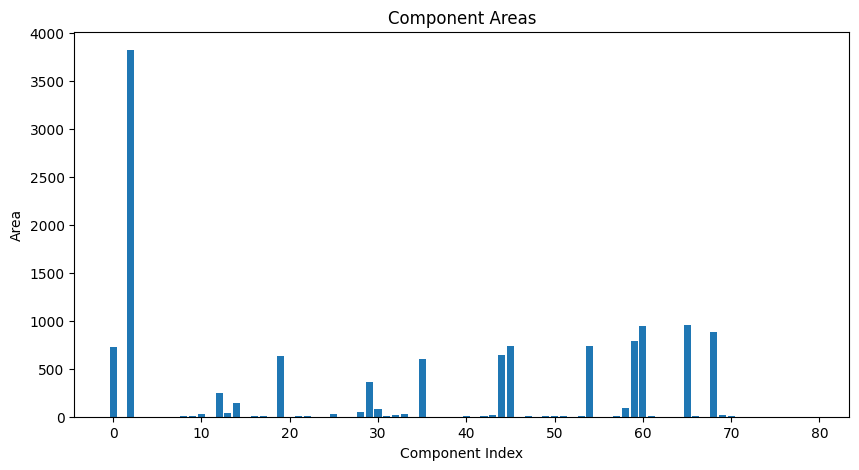

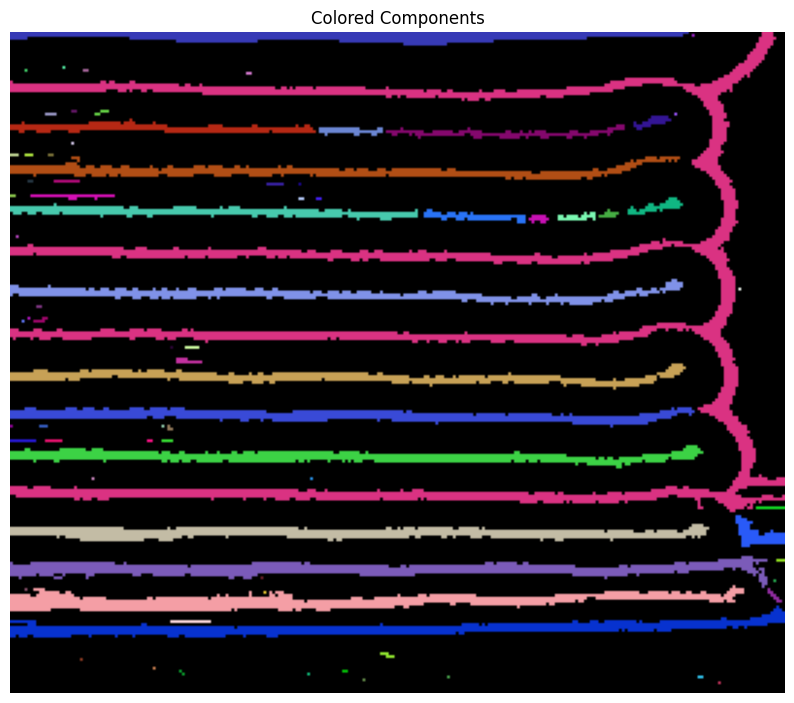

In [172]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh1, connectivity=8)
print(num_labels)
print(stats)
# Create a color image for visualization
color_image = cv2.cvtColor(thresh1, cv2.COLOR_GRAY2BGR)

# Define colors for each component (excluding background)
colors = np.random.randint(0, 255, size=(num_labels, 3), dtype=np.uint8)

# Color each component differently
for label in range(1, num_labels):  # label 0 is background
    color_image[labels == label] = colors[label]

# Plot areas of components
areas = stats[1:, cv2.CC_STAT_AREA]  # Exclude background
plt.figure(figsize=(10, 5))
plt.bar(range(len(areas)), areas)
plt.title('Component Areas')
plt.xlabel('Component Index')
plt.ylabel('Area')
plt.show()

# Display the colored components
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title('Colored Components')
plt.axis('off')
plt.show()


delete small sizes


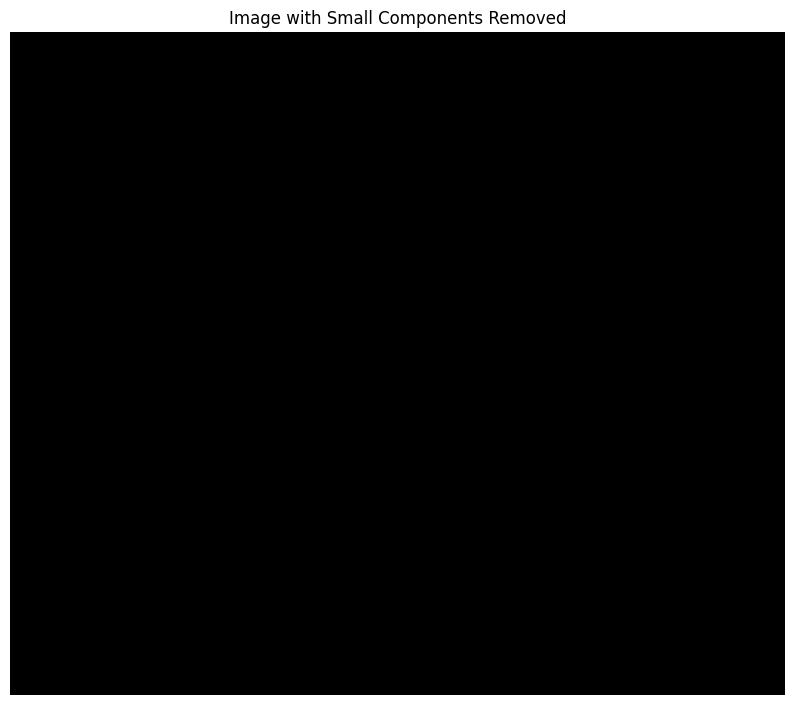

True

In [162]:
# Define a size threshold for what you consider 'small'
size_threshold = 75000  # Adjust based on your image size and needs

# Create a mask where only large components will be kept
mask = np.zeros(thresh1.shape, dtype="uint8")

for i in range(1, num_labels):  # Start from 1 because 0 is the background
    if stats[i, cv2.CC_STAT_AREA] >= size_threshold:
        mask[labels == i] = 255

# Apply the mask to the original image to remove small components
result_image = cv2.bitwise_and(img, img, mask=mask)

# Convert result back to color for visualization if it's grayscale
if len(result_image.shape) == 2:
    result_image = cv2.cvtColor(result_image, cv2.COLOR_GRAY2BGR)

# Display or save the result
plt.figure(figsize=(10, 10))
plt.imshow(result_image, cmap='gray' if len(result_image.shape) == 2 else None)
plt.title('Image with Small Components Removed')
plt.axis('off')
plt.show()

cv2.imwrite('cleaned_image.jpg', result_image)


morphological operations


20
[[     0      0    532    455 238594]
 [     0      2    104      1    104]
 [    77      4    274      3    485]
 [     0    105     75      1     75]
 [     0    110     73      2    129]
 [     0    151     58      1     58]
 [     0    179     51      1     51]
 [     0    208     51      1     51]
 [   227    210    118      1    118]
 [     0    236     56      2    112]
 [     0    263     51      1     51]
 [   162    264    211      2    235]
 [     0    316    223      3    405]
 [   255    319    118      1    118]
 [   481    320     51      1     51]
 [     0    343    135      3    244]
 [     0    368    208      3    403]
 [     0    383     62      1     62]
 [   241    409    215      3    408]
 [     0    412    187      2    306]]


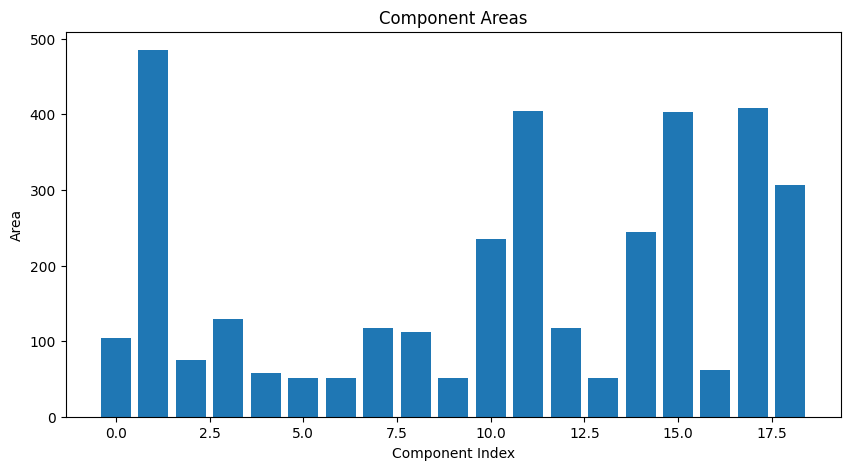

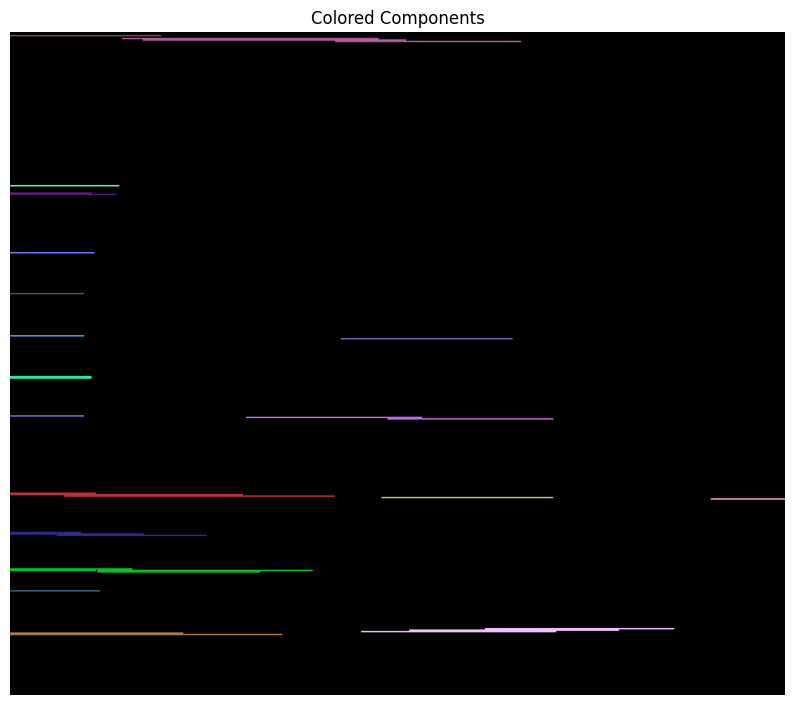

In [169]:
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))
detected_lines = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, horizontal_kernel, iterations=4)

# Step 5: Remove Noise and Small Regions
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(detected_lines, connectivity=8)
filtered = np.zeros_like(thresh1)
print(num_labels)
print(stats)

min_area = 10  # Minimum area to keep
for i in range(1, num_labels):
    if stats[i, cv2.CC_STAT_AREA] > min_area:
        filtered[labels == i] = 255

   # Plot the results

# Create a blank image for coloring regions
colored_result = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

# Define colors for each component (excluding background)
colors = np.random.randint(0, 255, size=(num_labels, 3), dtype=np.uint8)

# Color each component differently
for label in range(1, num_labels):  # label 0 is background
    colored_result[labels == label] = colors[label]

# Plot areas of components
areas = stats[1:, cv2.CC_STAT_AREA]  # Exclude background
plt.figure(figsize=(10, 5))
plt.bar(range(len(areas)), areas)
plt.title('Component Areas')
plt.xlabel('Component Index')
plt.ylabel('Area')
plt.show()

# Display the colored components
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(colored_result, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title('Colored Components')
plt.axis('off')
plt.show()


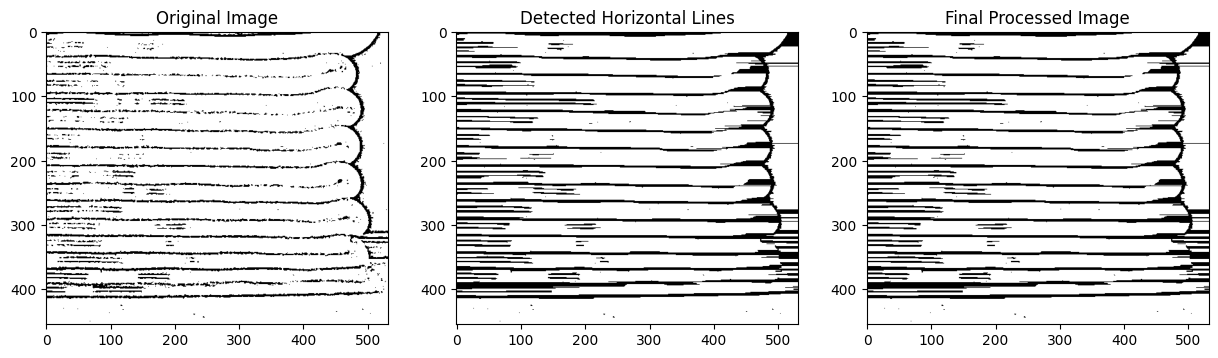

In [120]:
#Overlay the Extracted Lines on the Original Image
final_result = cv2.bitwise_and(thresh1, thresh1, mask=filtered)

# Step 7: Show Results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(thresh1, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Detected Horizontal Lines")
plt.imshow(filtered, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Final Processed Image")
plt.imshow(cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB))

plt.show()



201


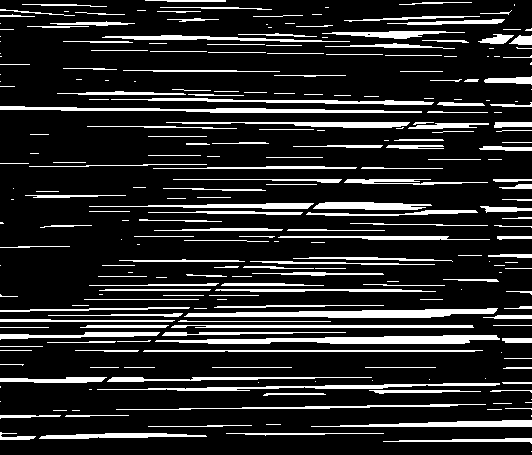

In [140]:
# Detect lines using Probabilistic Hough Line Transform
lines = cv2.HoughLinesP(filtered, 1, np.pi/180, threshold=200, minLineLength=500, maxLineGap=100)
print(len(lines))
# Create a blank image for drawing the filtered lines
filtered_image = np.copy(filtered)

# Define the minimum length for lines to be considered
min_line_length = 100  # Adjust this based on your image size and needs

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        if length > min_line_length:
            # Draw only lines longer than min_line_length on the filtered image
            cv2.line(filtered_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display or save the result
cv2.imwrite('filtered_lines.jpg', filtered_image)

# For display in environments like Google Colab:
if 'google.colab' in str(get_ipython()):
    from google.colab.patches import cv2_imshow
    cv2_imshow(filtered_image)
else:
    # Display locally
    cv2.imshow('Filtered Lines', filtered_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

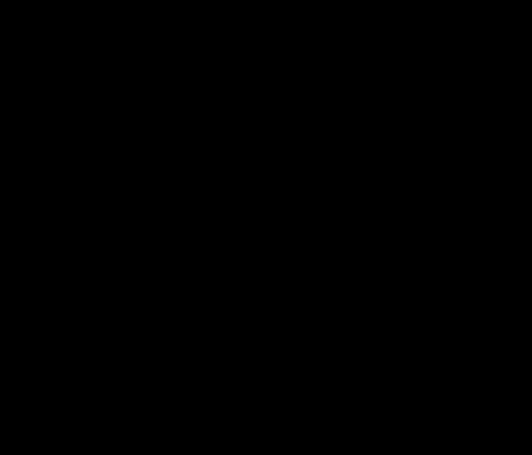

In [145]:

gray = image=img

# Apply thresholding (you might want to adjust this based on your image)
_, thresh = cv2.threshold(gray, 20, 180, cv2.THRESH_BINARY)

# Find contours, using RETR_EXTERNAL to get only outer contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank mask for drawing only external contours
mask = np.zeros_like(gray)

# Draw only external contours on the mask
cv2.drawContours(mask, contours, -1, 255, thickness=cv2.FILLED)

# Use the mask to keep only external contours in the original image
result = cv2.bitwise_and(image, image, mask=mask)

# Display or save the result
cv2.imwrite('external_contours_only.jpg', result)

# For display in environments like Google Colab:
if 'google.colab' in str(get_ipython()):
    from google.colab.patches import cv2_imshow
    cv2_imshow(result)
else:
    # Display locally
    cv2.imshow('External Contours Only', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()